# Waiter Tips Prediction

### Introduction
Tipping waiters for serving food depends on many factors like the type of restaurant, how many people you are with, how much amount you pay as your bill, etc.
Here in this prediction system we will try to predict the tips given to a waiter for serving the food in a restaurant.

### About the Dataset
Dataset = https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv
Columns:
1. total_bill: Total bill in dollars including taxes
2. tip: Tip given to waiters in dollars
3. sex: gender of the person paying the bill
4. smoker: whether the person smoked or not
5. day: day of the week
6. time: lunch or dinner
7. size: number of people in a table 

#### Importing Dependencies

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/bisht/Downloads/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
# Checking how many unique value do we have in day column
df.day.unique()

array([3, 2, 0, 1])

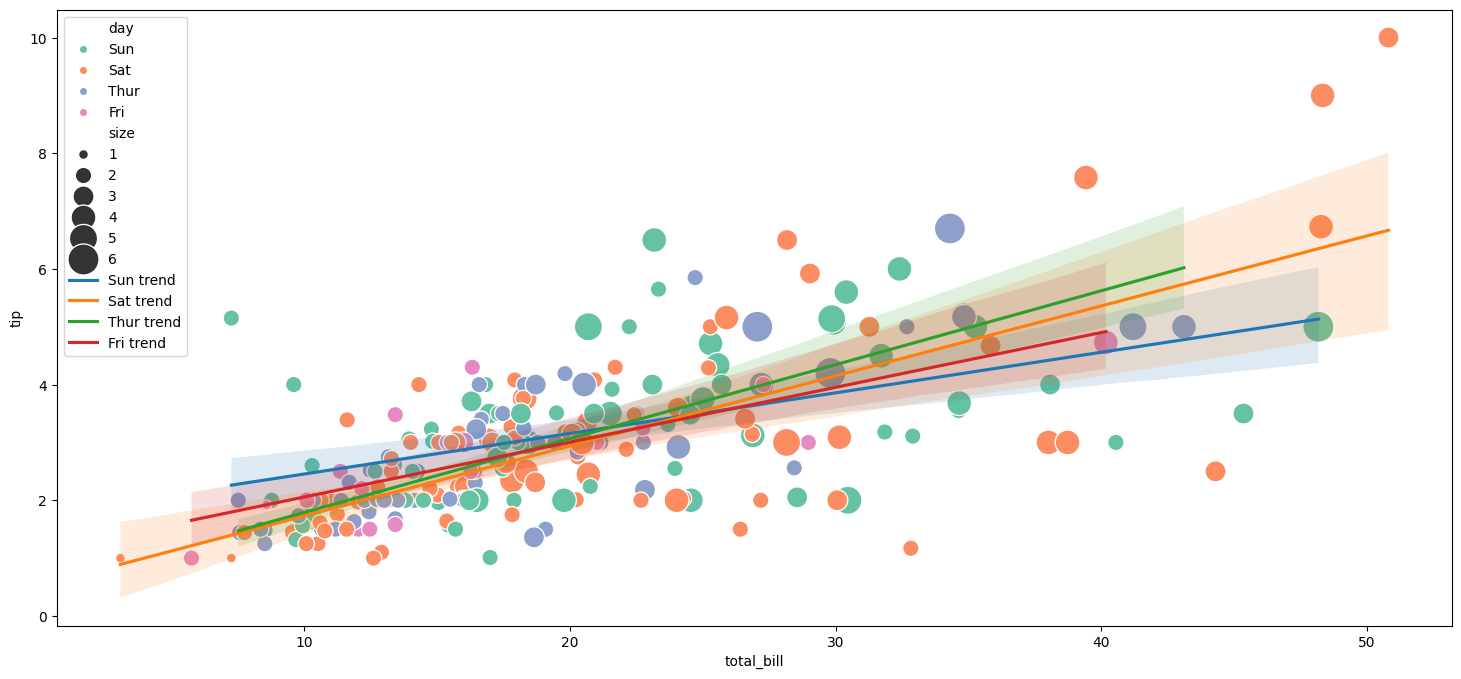

In [46]:
# Ploting a graph to visualize the correlation between tips and total bills across different weekdays, 
# with point sizes representing party size, plus separate regression lines for each day to 
# show how tipping trends vary by weekday. 

plt.figure(figsize = (18, 8))
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', size = 'size', hue = 'day', palette = 'Set2',
               sizes=(50, 500))

for day in df['day'].unique():
    day_data = df[df['day'] == day]
    sns.regplot(data = day_data, x = 'total_bill', y = 'tip', scatter = False, label = f'{day} trend')

plt.legend(loc = 0)
plt.show()

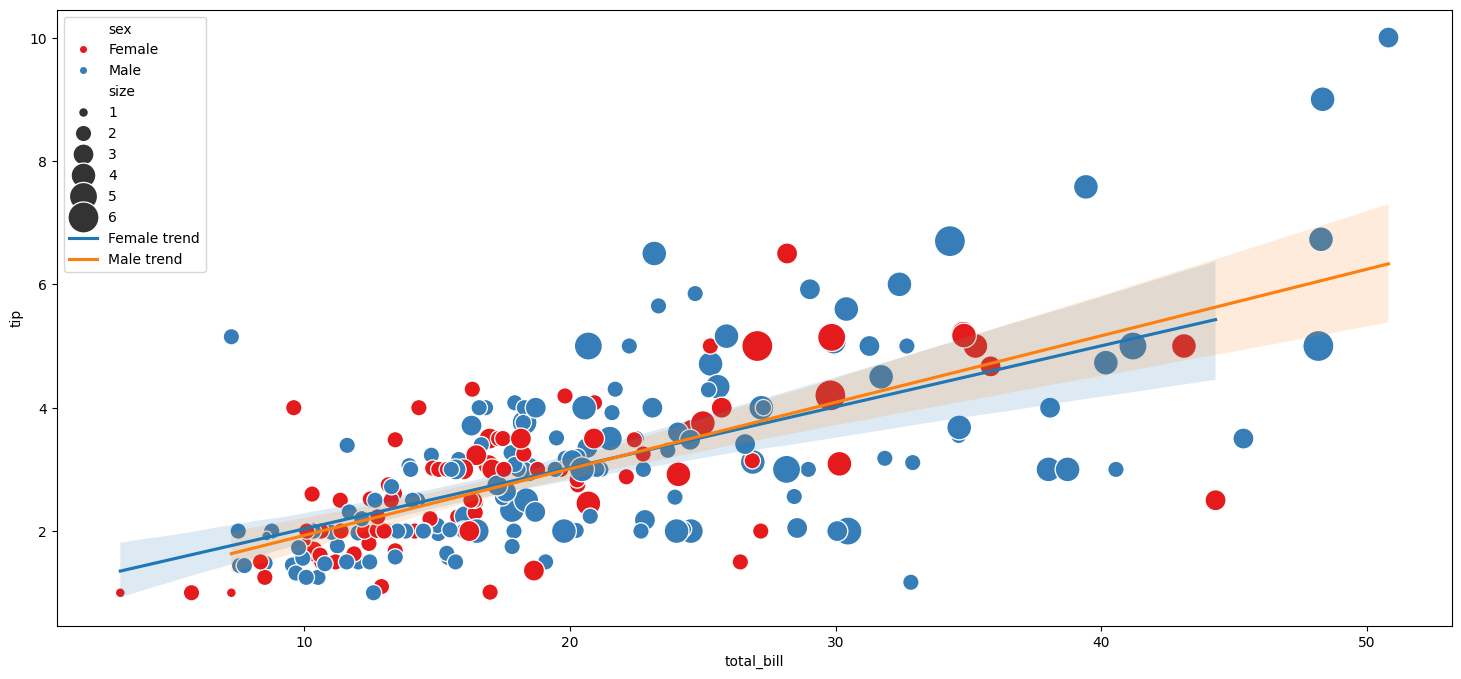

In [45]:
# Ploting a graph to visualize the correlation between tips and total bills as per different sex of 
# person paying the bill, with point sizes representing party size, plus separate regression lines 
# for both genders to show how tipping trends vary by sex. 

plt.figure(figsize = (18, 8))
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', size = 'size', hue = 'sex', palette = 'Set1',
               sizes=(50, 500))

for sex in df['sex'].unique():
    sex_data = df[df['sex'] == sex]
    sns.regplot(data = sex_data, x = 'total_bill', y = 'tip', scatter = False, label = f'{sex} trend')

plt.legend(loc = 0)
plt.show()

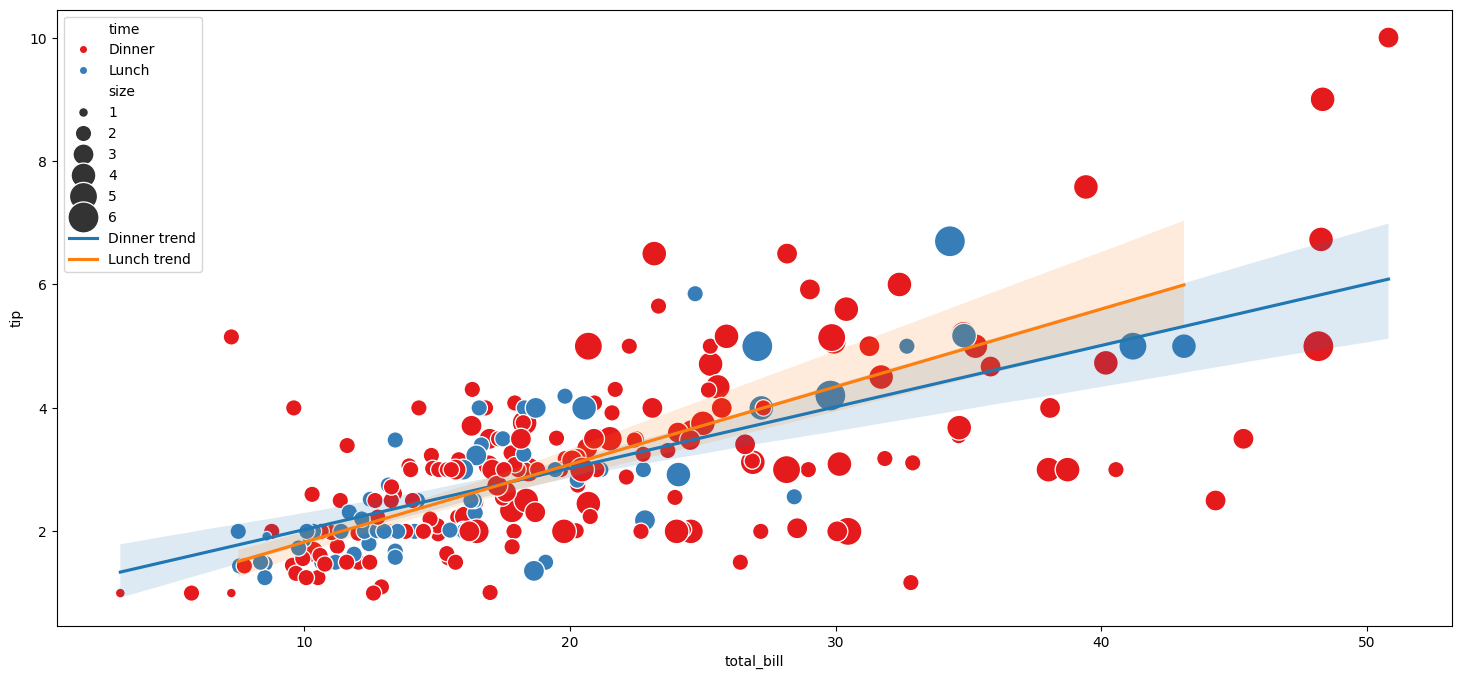

In [47]:
# Ploting a graph to visualize the correlation between tips and total bills accross different time, 
# with point sizes representing party size, plus separate regression lines for different time to 
# show how tipping trends vary by time. 

plt.figure(figsize = (18, 8))
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', size = 'size', hue = 'time', palette = 'Set1',
               sizes=(50, 500))

for time in df['time'].unique():
    time_data = df[df['time'] == time]
    sns.regplot(data = time_data, x = 'total_bill', y = 'tip', scatter = False, label = f'{time} trend')

plt.legend(loc = 0)
plt.show()

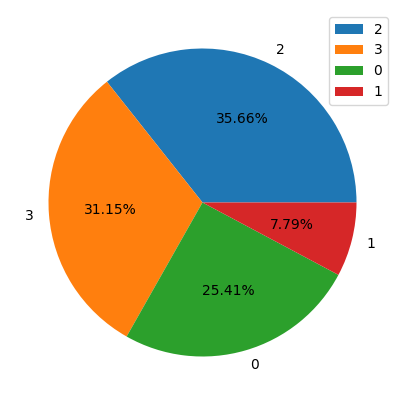

In [65]:
# Visualizing the tips given to the waiters according to the days to find on which day waiters 
# received the most number of tips.

day_counts = df['day'].value_counts()
tip = day_counts.values
labels = day_counts.index 

plt.figure(figsize = (5, 5))
plt.pie(tip, labels=labels, autopct='%.2f%%')
plt.legend(loc=0)
plt.show()


# On Saturday most tips were received by the waiters

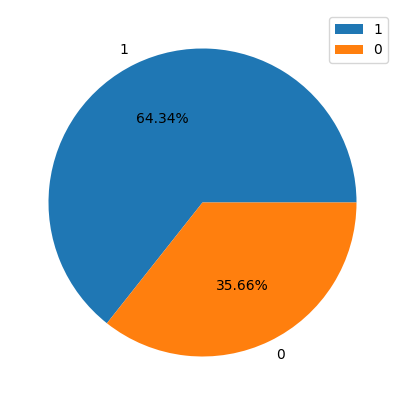

In [64]:
# Visualizing the tips given to the waiters according to the gender to find out which gender gave the 
# waiters most number of tips.

gender_counts = df['sex'].value_counts()
tip = gender_counts.values
labels = gender_counts.index 

plt.figure(figsize = (5, 5))
plt.pie(tip, labels=labels, autopct='%.2f%%')
plt.legend(loc=0)
plt.show()


# Most tips are given by men.

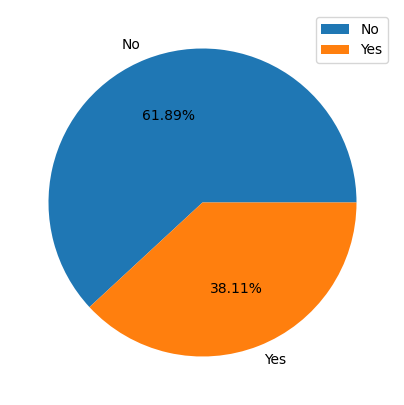

In [55]:
# Visualizing the tips given to the waiters according to the smokers to find out which if a smoker or a
# non-smoker gives most number of tips.

smoker_counts = df['smoker'].value_counts()
tip = smoker_counts.values
labels = smoker_counts.index 

plt.figure(figsize = (5, 5))
plt.pie(tip, labels=labels, autopct='%.2f%%')
plt.legend(loc=0)
plt.show()

# Most tips are given by Non-Smokers.

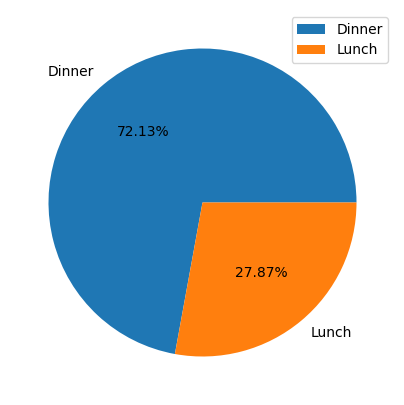

In [56]:
# Visualizing the tips given to the waiters to see if waiters received tips most during 
# the lunch or dinner.

time_counts = df['time'].value_counts()
tip = time_counts.values
labels = time_counts.index 

plt.figure(figsize = (5, 5))
plt.pie(tip, labels=labels, autopct='%.2f%%')
plt.legend(loc=0)
plt.show()

# Most tips were given during Dinner

### Creating the Waiter Tips Prediction Model

In [66]:
# Transforming the data from categorical to numerical to use it for training.
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,NaN,NaN,NaN,NaN,2
1,10.34,1.66,NaN,NaN,NaN,NaN,3
2,21.01,3.50,NaN,NaN,NaN,NaN,3
3,23.68,3.31,NaN,NaN,NaN,NaN,2
4,24.59,3.61,NaN,NaN,NaN,NaN,4


In [59]:
# Splitting the data into training and test sets.
X = np.array(df[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(df["tip"])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Creating and training the ML model for prediction
# Since our output y is tips i.e. numerical outputs we are using Linear Reg to check how much tip 
# the waiter will receive next time as per the features of the customers.

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[2450, 1, 0, 0, 1, 4]])

model.predict(features)  # features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)


# Therefore If a person books a table for 4 people and orders for a bill of $2450 and the person paying
# the bill is a male, not a smoker, day is Thursday and he is having the dinner then as per our 
# prediction model he will receive $3.74 of tip from him.

array([3.73742609])

In [70]:
# Checking the performance of our model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_hat = model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.6963
Root Mean Squared Error (RMSE): 0.8345
Mean Absolute Error (MAE): 0.6686
R² Score: 0.4429


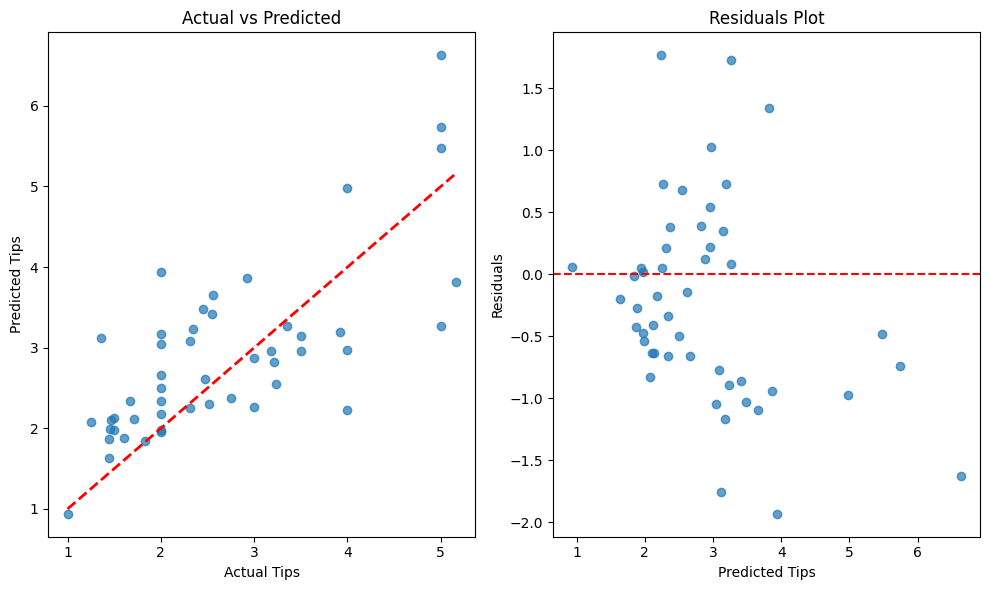

In [72]:
import matplotlib.pyplot as plt

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_hat, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted')

# Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test - y_hat
plt.scatter(y_hat, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tips')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()